# Projeto Mercado de Games

In [25]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

# Verificando os Dados

In [26]:
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding = 'latin-1')

base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [31]:
base_dados.shape

(825, 9)

# Procurando Dados Nulos

In [28]:
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

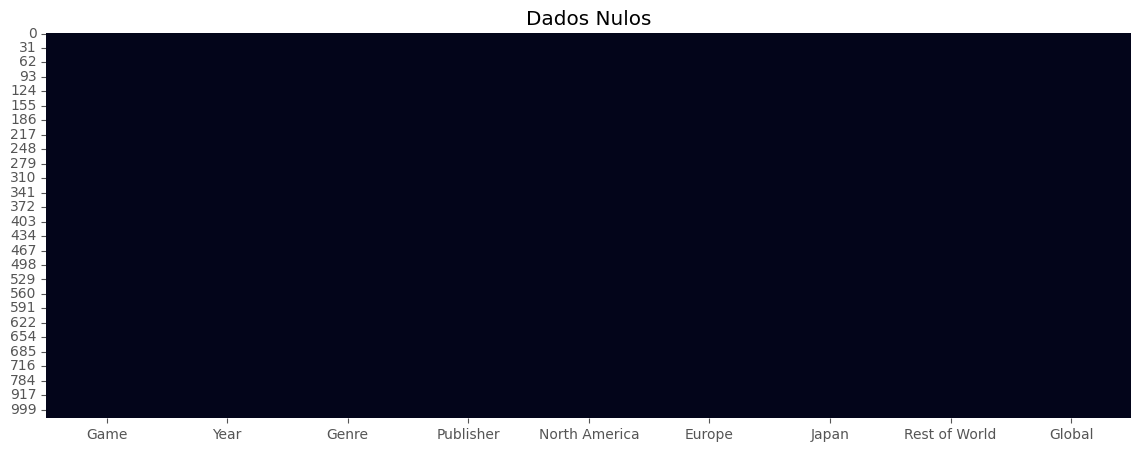

In [32]:
plt.figure(figsize = (14,5))
plt.title('Dados Nulos')
sns.heatmap(base_dados.isnull(), cbar = False);

# Retirando Dados Nulos

In [30]:
base_dados.dropna(inplace = True)

# Estatísticas

In [33]:
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


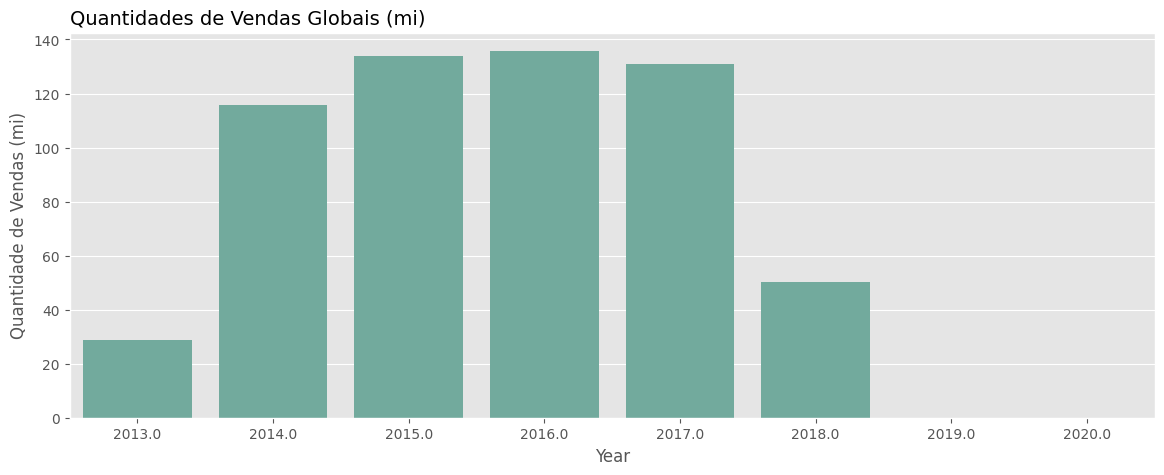

In [34]:
# Tamanho da Imagem

plt.figure(figsize =(14,5))

# Título

plt.title('Quantidades de Vendas Globais (mi)',loc = 'left',fontsize = 14)

# Gráfico

sns.barplot(base_dados, x = 'Year',y ='Global', ci = None, color = '#69b3a2', estimator = sum)

# Label

plt.ylabel('Quantidade de Vendas (mi)');

# Retirando os anos 2019 - 2020(Nulos)

In [35]:
base_dados = base_dados.loc[(base_dados['Year'] != 2019) & (base_dados['Year'] != 2020) ]
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


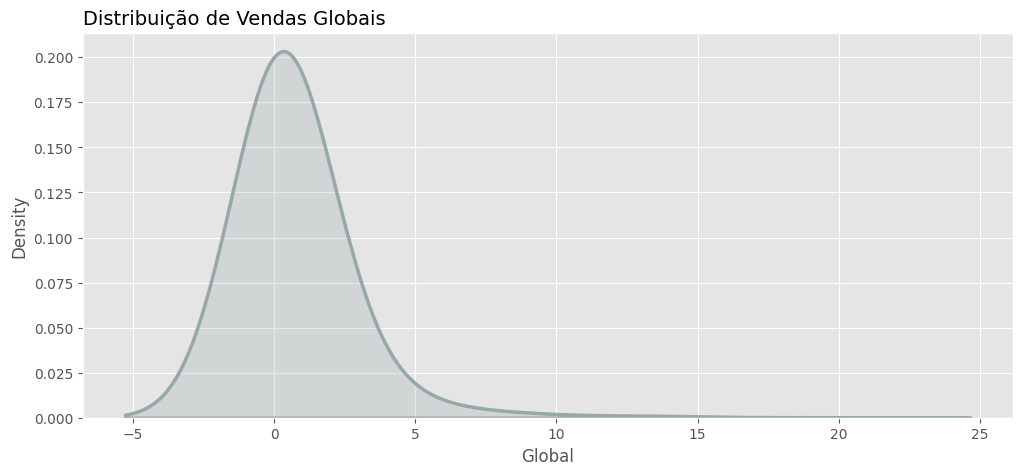

In [36]:
# Tamanho
plt.figure(figsize =(12, 5))

# Estilo 
plt.style.use('ggplot')

# Título
plt.title('Distribuição de Vendas Globais', loc = 'left', fontsize = 14)

# Plot
sns.kdeplot(base_dados['Global'], shade = True,bw = 1, color = '#96a8a8', linewidth = 2.5);


In [11]:
Analise = base_dados.groupby(by = ['Year']).sum()

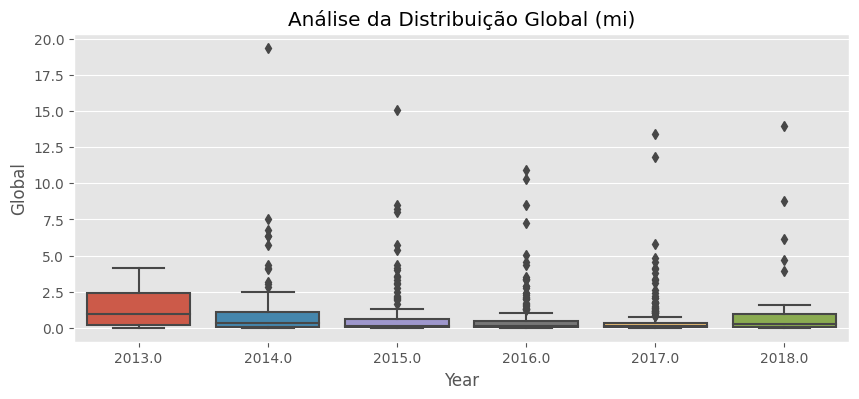

In [37]:
# Tamanho
plt.figure(figsize = (10, 4))

# Título
plt.title('Análise da Distribuição Global (mi)')

# Plot
sns.boxplot(base_dados, x = 'Year' ,y = 'Global');

In [38]:
base_dados.loc[ base_dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


# Analisando a proporção dos 100% de cada continente comparado ao Total

In [39]:
America = [America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global']) ]
Europa = [Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global']) ]
Japao = [Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global']) ]
Mundo= [Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global']) ]

America,Europa,Japao,Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [40]:
Analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


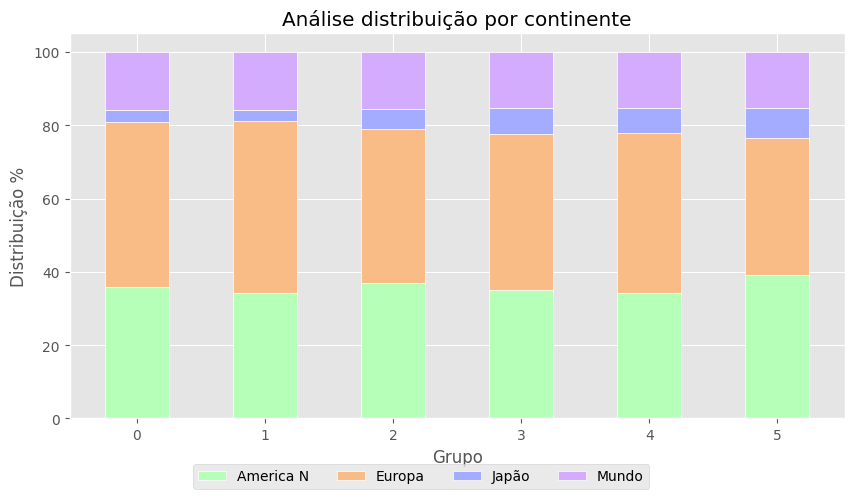

In [41]:
# Tamanho
plt.figure(figsize =(10, 5))

# Largura dos gráficos
Largura_Barra = 0.5
Rotulos = Analise
Grupos = [0, 1, 2, 3, 4, 5]


# Título
plt.title('Análise distribuição por continente')


#Plot da América

plt.bar( Grupos, America, width = Largura_Barra, color = '#b5ffb9', edgecolor = 'white' )

#Plot da Europa

plt.bar( Grupos, Europa,bottom = America , width = Largura_Barra, color = '#f9bc86', edgecolor = 'white' )

#Plot do Japão

plt.bar( Grupos, Japao, bottom =[A + B for A, B in zip(America, Europa)] , width = Largura_Barra, color = '#a3acff', edgecolor = 'white' )

#Plot no Resto do Mundo

plt.bar( Grupos, Mundo, bottom =[A + B + C for A, B, C in zip(America, Europa,Japao) ] , width = Largura_Barra, color = '#d3acfe', edgecolor = 'white' )

# labels
plt.xticks(Grupos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend(['America N','Europa','Japão','Mundo'], loc = 'upper left', bbox_to_anchor = (0.15, -0.1), ncol = 4);

In [42]:
base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [43]:
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()

base_dados['Produtor'] = funcao_label.fit_transform (base_dados['Publisher'])
base_dados['Gênero'] = funcao_label.fit_transform (base_dados['Genre'])
base_dados['Jogo'] = funcao_label.fit_transform (base_dados['Game'])

base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Gênero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [44]:
paleta_cores = sns.color_palette('husl', 15)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.959647907830888, 0.3748291312853892, 0.893004453766301),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104)]

#  Análise dos Produtores de Games (mi)

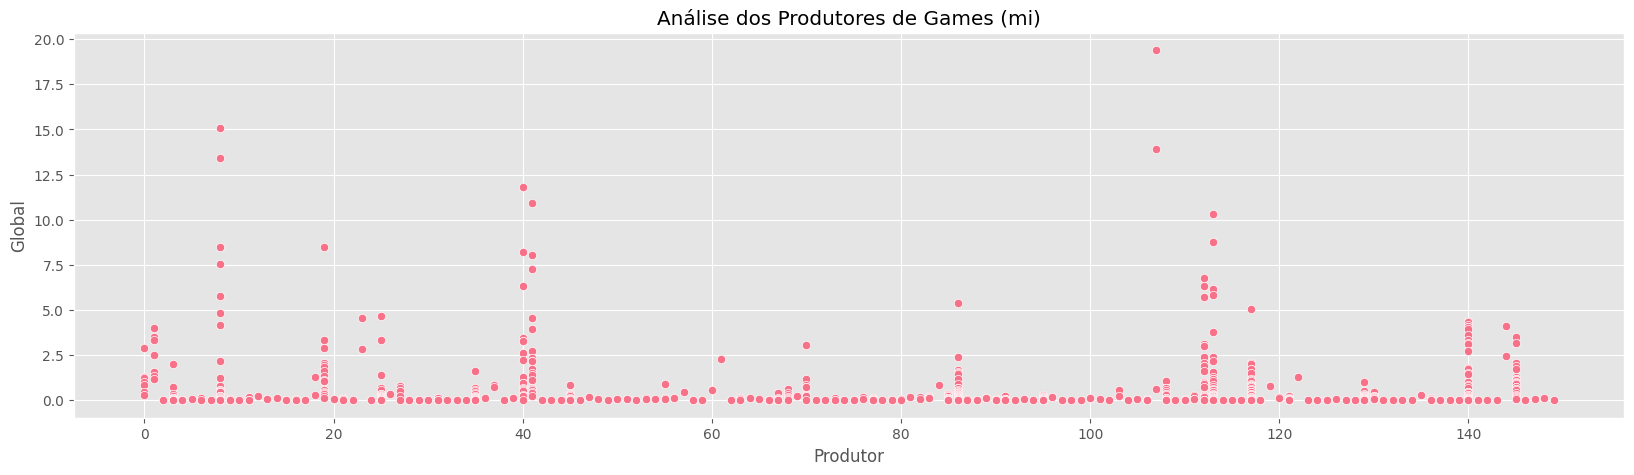

In [46]:
# Tamanho
plt.figure(figsize = (20, 5))

# Título
plt.title('Análise dos Produtores de Games (mi)')

# Plot
sns.scatterplot(data = base_dados , x = 'Produtor' , y = 'Global', color = paleta_cores[0] );

#  Análise dos Gêneros de Games


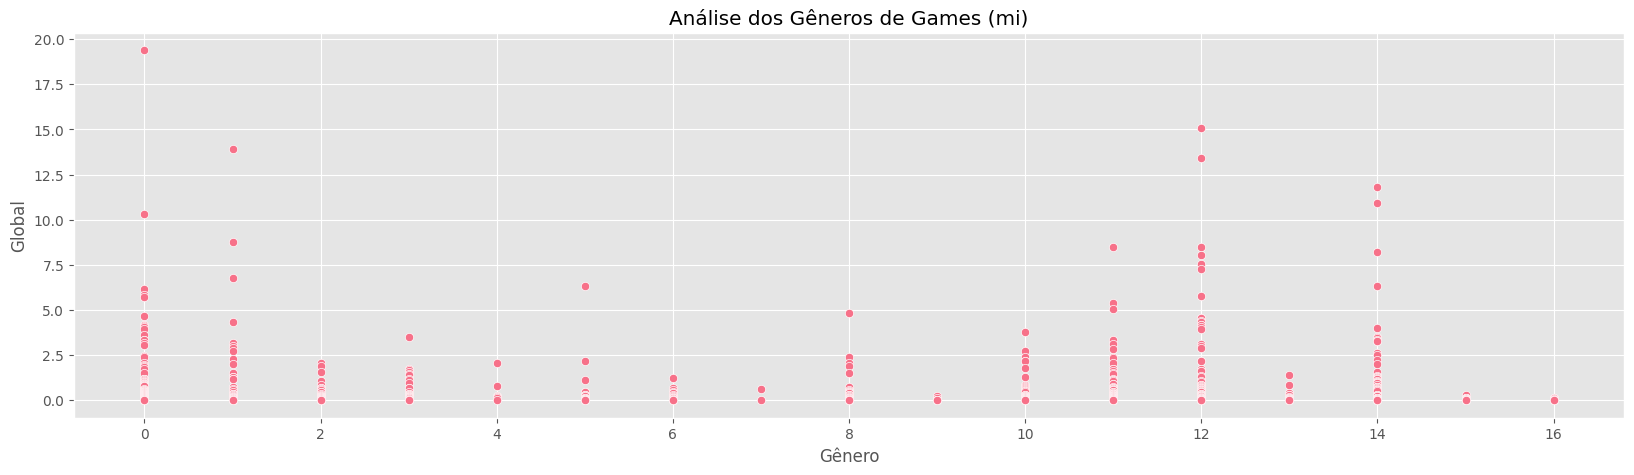

In [47]:
# Tamanho
plt.figure(figsize = (20, 5))

# Título
plt.title('Análise dos Gêneros de Games (mi)')

# Plot
sns.scatterplot(data = base_dados , x = 'Gênero' , y = 'Global', color = paleta_cores[0] );

#  Análise dos Games

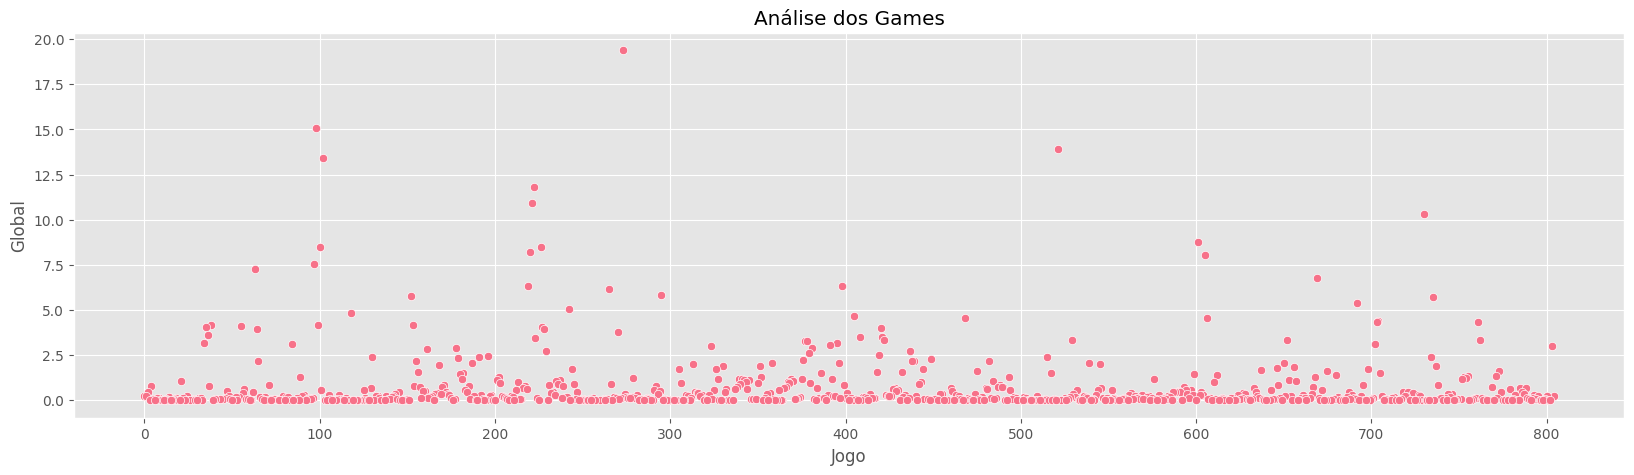

In [48]:
# Tamanho
plt.figure(figsize = (20, 5))

# Título
plt.title('Análise dos Games')

# Plot
sns.scatterplot(data = base_dados , x = 'Jogo' , y = 'Global', color = paleta_cores[0] );


# Relatório --> Report para o Chefe

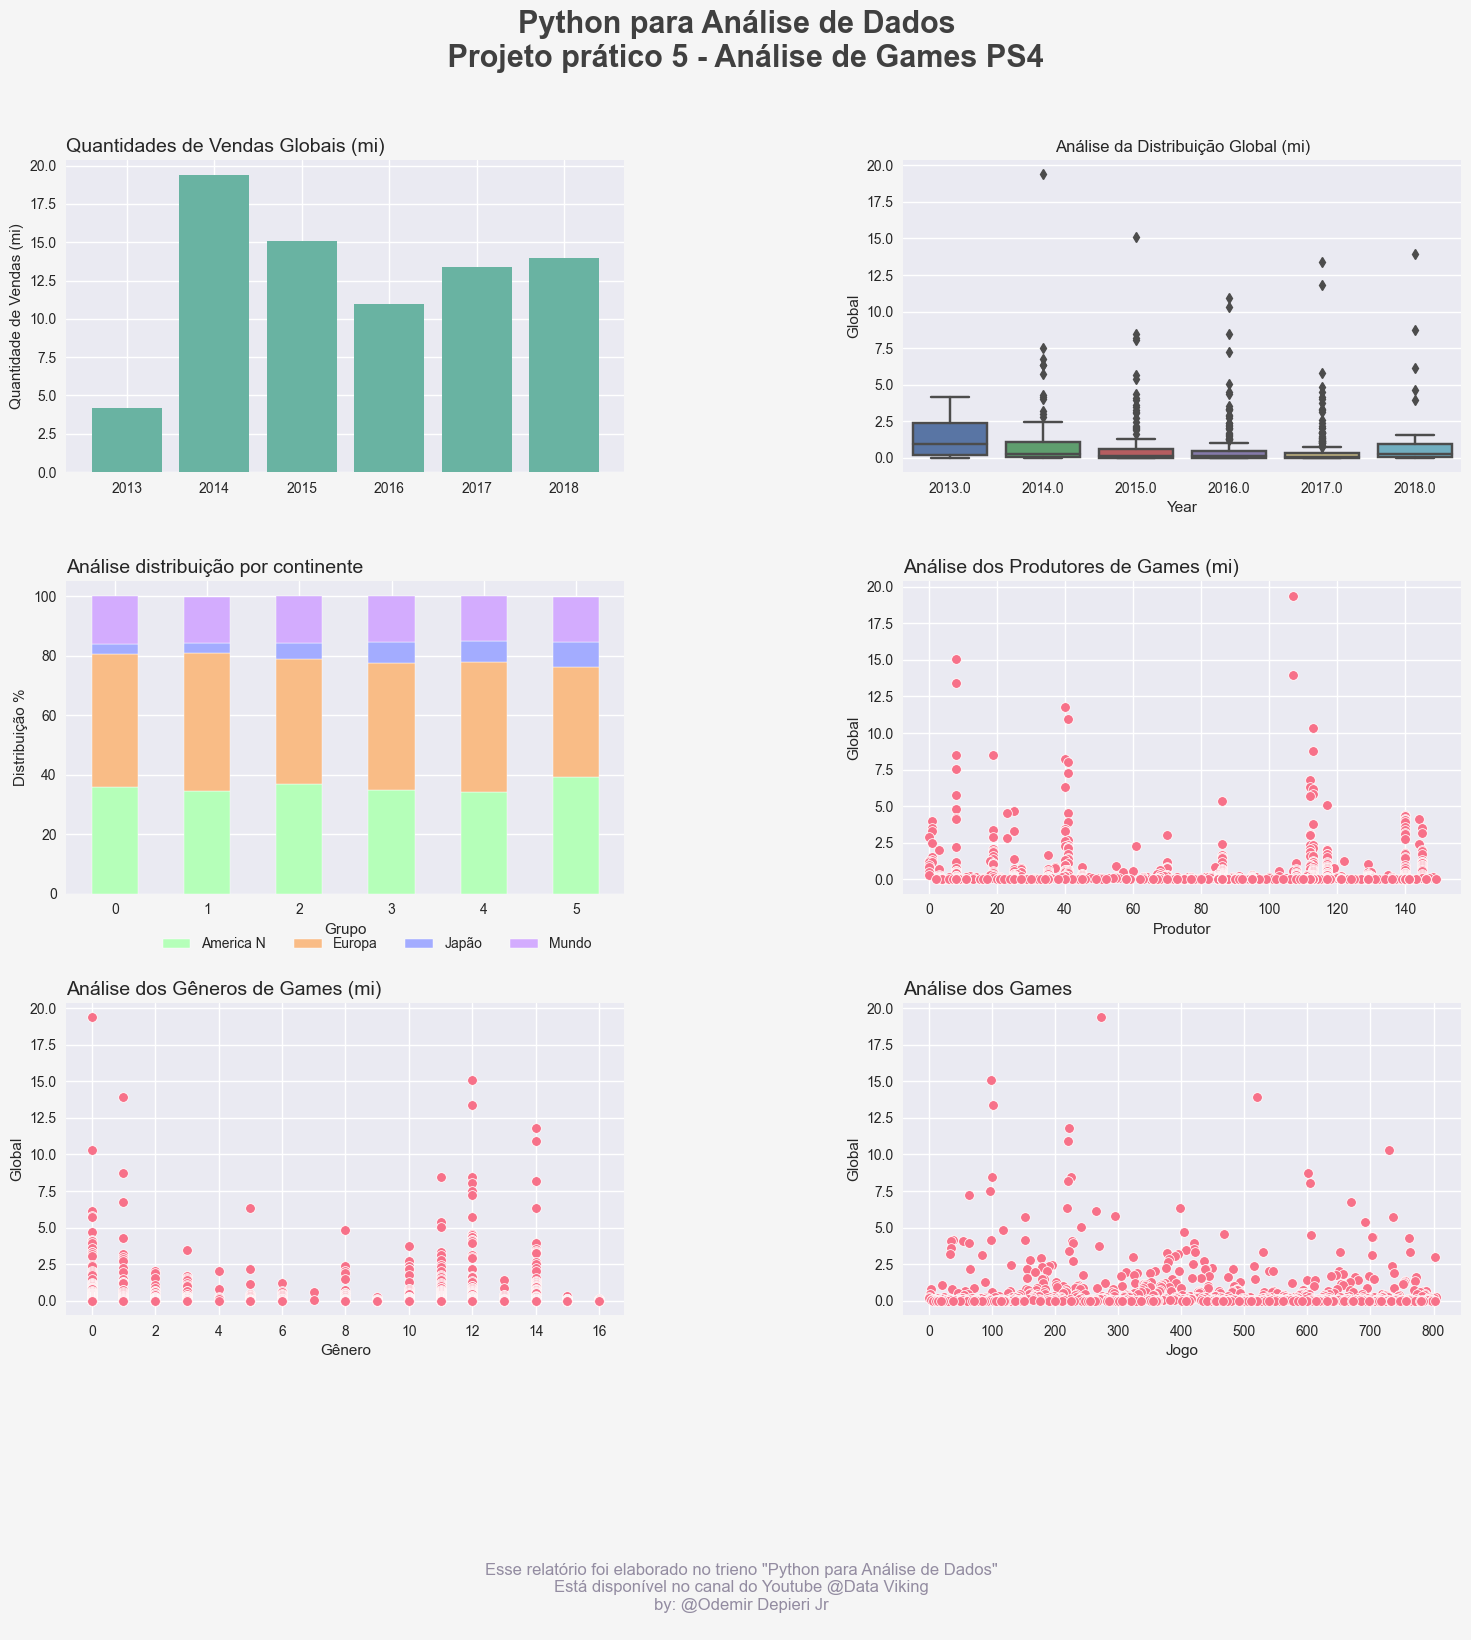

In [74]:
# Tamanho da imagem

fig, ax =plt.subplots(figsize = (18,15))

# Cor de Fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos gráficos
plt.style.use('seaborn')

# Título da figura
plt.suptitle('Python para Análise de Dados \n Projeto prático 5 - Análise de Games PS4', fontsize = 22, color = '#404040',fontweight = 600)

# Parâmetros para o grid
linhas = 3 
colunas = 2





# Acessando o gráfico 1
plt.subplot(linhas,colunas, 1)
# Título

plt.title('Quantidades de Vendas Globais (mi)',loc = 'left',fontsize = 14)

# Gráfico

plt.bar(base_dados['Year'],base_dados['Global'], color = '#69b3a2')

# Label

plt.ylabel('Quantidade de Vendas (mi)');





# Acessando o gráfico 2
plt.subplot(linhas,colunas, 2)

# Título
plt.title('Análise da Distribuição Global (mi)')

# Plot
sns.boxplot(base_dados, x = 'Year' ,y = 'Global');





# Acessando o gráfico 3
plt.subplot(linhas,colunas, 3)

# Largura dos gráficos
Largura_Barra = 0.5
Rotulos = Analise
Grupos = [0, 1, 2, 3, 4, 5]


# Título
plt.title('Análise distribuição por continente',loc = 'left',fontsize = 14)

#Plot da América
plt.bar( Grupos, America, width = Largura_Barra, color = '#b5ffb9', edgecolor = 'white' )
#Plot da Europa
plt.bar( Grupos, Europa,bottom = America , width = Largura_Barra, color = '#f9bc86', edgecolor = 'white' )
#Plot do Japão
plt.bar( Grupos, Japao, bottom =[A + B for A, B in zip(America, Europa)] , width = Largura_Barra, color = '#a3acff', edgecolor = 'white' )
#Plot no Resto do Mundo
plt.bar( Grupos, Mundo, bottom =[A + B + C for A, B, C in zip(America, Europa,Japao) ] , width = Largura_Barra, color = '#d3acfe', edgecolor = 'white' )

# labels
plt.xticks(Grupos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend(['America N','Europa','Japão','Mundo'], loc = 'upper left', bbox_to_anchor = (0.15, -0.1), ncol = 4);





# Acessando o gráfico 4
plt.subplot(linhas,colunas, 4)
# Título
plt.title('Análise dos Produtores de Games (mi)',loc = 'left',fontsize = 14)

# Plot
sns.scatterplot(data = base_dados , x = 'Produtor' , y = 'Global', color = paleta_cores[0] );





# Acessando o gráfico 5
plt.subplot(linhas,colunas, 5)
# Título
plt.title('Análise dos Gêneros de Games (mi)',loc = 'left',fontsize = 14)

# Plot
sns.scatterplot(data = base_dados , x = 'Gênero' , y = 'Global', color = paleta_cores[0] );





# Acessando o gráfico 6
plt.subplot(linhas,colunas, 6)

# Título
plt.title('Análise dos Games',loc = 'left',fontsize = 14)

# Plot
sns.scatterplot(data = base_dados , x = 'Jogo' , y = 'Global', color = paleta_cores[0] );





# Ajustar o layout
plt.subplots_adjust(hspace =0.35,wspace = 0.5)

# Rodapé
rodape = '''
Esse relatório foi elaborado no trieno "Python para Análise de Dados"
Está disponível no canal do Youtube @Data Viking
by: @Odemir Depieri Jr
'''

# Incluindo o rodapé no relatório
fig.text(0.5,-0.1,rodape,ha = 'center', va = 'bottom', size = 12, color = '#938ca1');